# 13wk-1: Plotly

최규빈  
2023-11-27

# 1. 강의영상

# 2. Imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#---#
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [16]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# 3. Intro

## A. 궁금해

12wk-2 강의노트중..

In [55]:
df_sample = pd.DataFrame(
    {'path':['A','A','B','B','B'],
     'lon':[-73.986420,-73.995300,-73.975922,-73.988922,-73.962654],
     'lat':[40.756569,40.740059,40.754192,40.762859,40.772449]}
)
fig = px.line_mapbox(
    data_frame=df_sample,
    lat = 'lat',
    lon = 'lon',
    color = 'path',
    line_group = 'path',
    #---#
    mapbox_style = 'carto-positron',
    zoom=12,
    width = 750,
    height = 600    
)
scatter_data = px.scatter_mapbox(
    data_frame=df_sample,
    lat = 'lat',
    lon = 'lon',
    color = 'path',
    #---#
    mapbox_style = 'carto-positron',
    zoom=12,
    width = 750,
    height = 600    
).data 
fig.add_trace(scatter_data[0])
fig.add_trace(scatter_data[1])
fig.show(config={'scrollZoom':False})

도데체 저런코드는 어떻게 알아내는 걸까?

## B. 심슨의 역설 데이터

`-` 아래의 자료를 관찰하자.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).reset_index().melt(id_vars='index').set_axis(['department','gender','result','count'],axis=1)
df.head()

## C. `plotly`의 시각화구조

`-` 아래와 같은 방법이 가능하다.

-   pandas backend
-   `px`, 즉 `plotly.express`를 이용한 시각화
-   `go`, 즉 `plotly.graph_objects`를 이용한 시각화
-   `pio`, 즉 `plotly.io`를 이용한 시각화

`-` 예시1: pandas backend

In [5]:
df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()\
.plot.bar(
    x='gender', y='rate',
    color='gender',
    text='rate',
    title='버클리대학교의 남녀합격률',
    width=600
)

`-` 예시2: `px.bar`를 이용한 plot

In [51]:
tidydata = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()
#---#
px.bar(
    tidydata, 
    x = 'gender', y = 'rate',
    color='gender',
    text='rate',
    title='버클리대학교의 남녀합격률',
    width=600
)

`-` 예시3: `px.bar`를 이용한 플랏 (pandas Series를 입력) – 결과가 조금
다름

In [7]:
tidydata

In [8]:
px.bar(
    x = tidydata.gender, y = tidydata.rate,
    color = tidydata.gender, 
    text = tidydata.rate, 
    title='버클리대학교의 남녀합격률',
    width=600
)

-   x축,y축,legend의 제목이 살짝 달라지긴 했음..

`-` 예시4: `px.bar`를 이용한 플랏 (list를 입력) – 결과가 조금 다름

In [9]:
px.bar(
    x = ['female','male'], y = [0.42,0.52],
    color = ['female','male'], 
    text = [0.42,0.52], 
    title = '버클리대학교의 남녀합격률',
    width = 600
)

`예시5`: `go`를 이용한 시각화 – 색깔시각화가 불가능

`-` ggplot() + geom_col() 의 느낌으로!

In [17]:
fig = go.Figure()
fig 

In [18]:
bar = go.Bar(
    x = ['female','male'], y = [0.42,0.52]
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar).update_layout(layout)

-   색을 어떻게 구분하냐?

`예시5`: `go`를 이용한 시각화 – 색깔시각화 가능

`-` ggplot() + geom_col() 의 느낌으로!

-   색을 어떻게 구분하냐?

`#`

`예시6`: `go`를 이용한 시각화 – matplotlib의 겹쳐그리기 감성 구현
($\star$)

`(예비학습)` – 이런느낌이 있었지

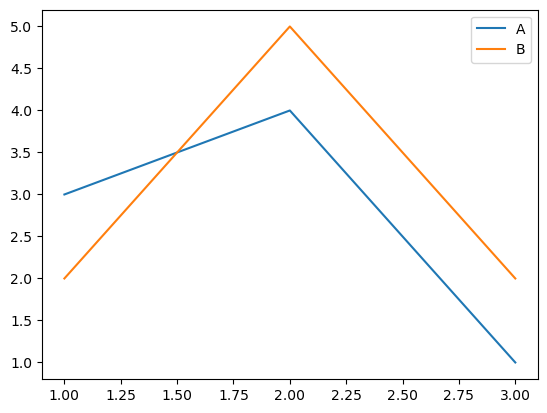

In [37]:
plt.plot([1,2,3],[3,4,1],label='A')
plt.plot([1,2,3],[2,5,2],label='B')
plt.legend()

이걸 응용하면

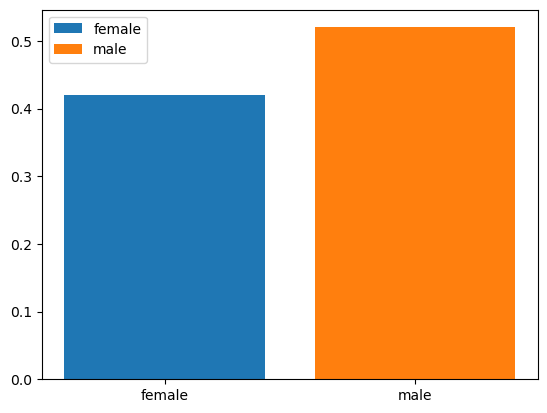

In [39]:
plt.bar('female',0.42,label='female')
plt.bar('male',0.52,label='male')
plt.legend()

`#`

예비학습에서 힌트를 얻으면!

In [41]:
fig = go.Figure()
bar_female = go.Bar(
    x = ['female'], y = [0.42],
    name = 'female',
    text = [0.42]
)
bar_male = go.Bar(
    x = ['male'], y = [0.52],
    name = 'male',
    text = [0.52]
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

`예시7`: `go`를 이용한 시각화 – 색상의 변경

-   여자는 빨강, 남자는 파랑으로?

In [13]:
fig = go.Figure()
bar_female = go.Bar(
    x = ['female'], y = [0.42],
    name = 'female',
    text = [0.42],
    marker = {'color':'red'}
)
bar_male = go.Bar(
    x = ['male'], y = [0.52],
    name = 'male',
    text = [0.52],
    marker = {'color':'blue'}
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

`#`

`예시8`: `go`를 이용한 시각화 – 색상재설정 + x축, y축, legend의 title의
설정 + hover 설정

-   색상설정: `#EF553B`,`#636efa`
-   hovertemplate: `'gender=%{x}<br>rate=%{text}<extra></extra>'`

In [53]:
fig = go.Figure()
bar_female = go.Bar(
    x = ['female'], y = [0.42],
    name = 'female',
    text = [0.42],
    marker = {'color':'#EF553B'},
    hovertemplate = 'gender=%{x}<br>rate=%{text}<extra></extra>'
)
bar_male = go.Bar(
    x = ['male'], y = [0.52],
    name = 'male',
    text = [0.52],
    marker = {'color':'#636efa'},
    hovertemplate = 'gender=%{x}<br>rate=%{text}<extra></extra>'
)
layout = {
    'title':'버클리대학교의 남녀합격률',
    'width':600,
    'legend':{'title':'gender'},
    'xaxis':{'title':'gender'},
    'yaxis':{'title':'rate'}
}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

`#`

***궁금: `#EF553B` 이런거 어떻게 알았어?…***

In [54]:
fig = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()\
.plot.bar(
    x='gender', y='rate',
    color='gender',
    text='rate',
    title='버클리대학교의 남녀합격률',
    width=600
)
fig.data

## D. `px` vs `go`

`-` `go`는 핸드메이드 제품을 `px`는 양산품을 만든다고 이해하면 편리하다.

-   `go`의 특징: 유저의 자유도가 매우 높음 (내가 직접 하는 느낌). 이는
    그림의 크기, 색상 등을 선호에 맞게 조정하기 유리. 생산성이 낮음.
-   `px`의 특징: 유저의 자유도가 낮음 (알아서 해주는 느낌). 원하는
    그림을 빠르게 생산할 수 있음. 다만 내가 원하는 디자인이 나오지 않을
    수 있음.

`-` 뭘 써야 할까?

-   `px`를 쓰는게 좋다.
-   그런데 `go`를 이용하여 그림이 그려지는 원리를 이해하면 이후에 `px`를
    이용한 그림을 수정하기 용이하다.
-   전략: `px`로 그림을 그린다. + `go`로 수정한다.

# 2. `pio`를 이용한 시각화

In [68]:
## A. 함수의 동작 

`예제1` – dictionary + `pio.show()`

In [65]:
fig = dict()
fig['data'] = [
    {"type": "bar", "x": ['female'], "y": [0.42]},
    {"type": "bar", "x": ['male'], "y": [0.52]}
]
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}

In [66]:
fig

In [67]:
pio.show(fig)

`#`

In [6]:
fig['data'][0]['y'] = [1,-3,1]

In [7]:
pio.show(fig)

수정2

In [8]:
fig['layout']['title']['text'] = '제목(수정됨)'

In [9]:
pio.show(fig)

수정3

In [10]:
fig['data'][0]['type'] = 'scatter'

In [11]:
pio.show(fig)

In [12]:
fig['data'][0]['mode'] = 'lines'

In [13]:
pio.show(fig)

In [14]:
fig['data'][0]['mode'] = 'markers'

In [15]:
pio.show(fig)

In [16]:
fig['data'][0]['marker'] = {'symbol': 'circle','color':'red'}

In [17]:
pio.show(fig)

In [18]:
fig['data'].append(
    {'x': [1, 2, 3],
     'y': [1.5, 3, 1.5], 
     'mode': 'markers', 
     'marker': {'symbol': 'circle', 'color': 'blue'}, 'type': 'scatter'}
)

In [19]:
pio.show(fig)

------------------------------------------------------------------------

# go

`-`

In [20]:
fig = go.Figure()

In [21]:
fig

In [22]:
# dict(x=[1,2,3],y=[2,3,4])
go_scatter1 = go.Scatter(x=[1,2,3],y=[2,3,4])
go_scatter2 = go.Scatter(x=[1,2,3],y=[2,3,-3])

In [23]:
fig.add_trace(go_scatter1).add_trace(go_scatter2)

In [24]:
fig = go.Figure()
fig.add_bar(x=[1,2,3],y=[2,3,1])
fig.add_scatter(x=[1,2,3],y=[2,3,1])
fig.data[0]['name']='y_bar'
fig.data[1]['name']='y_line'
fig.data[0]['legendgroup']='y'
fig.data[1]['legendgroup']='y'
fig

`-` selector의 역할.. 너무 어려운뎅? (지정안하면 전체업데이트함)

In [25]:
fig = go.Figure()
fig.add_bar(x=[1,2,3],y=[2,3,1],name='y_bar')
fig.add_scatter(x=[1,2,3],y=[2,3,1],name='y_line')
fig.update_traces(marker_color='orange',selector={'name':'y_line'})
fig

# `go.Scatter`

`-` 예시1

In [26]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1]
)
fig.add_trace(scatter)

`-` 예시2

In [27]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines'
)
fig.add_trace(scatter)

`-` 예시3

In [28]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='markers'
)
fig.add_trace(scatter)

`-` 예시4

In [29]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines+markers'
)
fig.add_trace(scatter)

`-` 예시5

In [30]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines+markers',
    name='test'
)
fig.add_trace(scatter)

`-` 예시6

In [31]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines+markers',
    name='test',
    marker={'color':'red','size':10,'symbol':'circle','line':{'width':2,'color':'blue'}}
)
fig.add_trace(scatter)

In [34]:
fig.data

In [39]:
fig = go.Figure()
scatter = go.Scatter(
    {
     'marker': {'color': 'red', 'line': {'color': 'blue', 'width': 2}, 'size': 10, 'symbol': 'circle'},
     'mode': 'lines+markers',
     'name': 'test',
     'x': [1, 2, 3],
     'y': [2, 3, -1]
 }  
)
fig.add_trace(scatter)

`-` 예시7

In [588]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines+markers',
    name='test',
    marker={'color':'red','size':10,'symbol':'circle','line':{'width':2,'color':'blue'}},
    line={'width':0.5,'color':'green'}
)
fig.add_trace(scatter)

`-` 색상변경

In [546]:
fig = pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',
)
fig.update_traces(
    line_color = 'red',
    line_dash= 'dash'
)

`-` 색상변경2

In [509]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr'
)

In [510]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr'
)

In [519]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    category_orders= {'clr':['B','A']}
)

In [531]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    color_discrete_sequence = ['orange','green'],
    
)

In [532]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    color_discrete_map = {'B':'orange','A':'green'},
)

`-` 라인의 타입변경

`-` dot-connected plot

In [520]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    color_discrete_map = {'B':'orange','A':'green'}
)

In [ ]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    color_discrete_map = {'B':'orange','A':'green'}
)

In [483]:
_fig

In [484]:
go.Figure().add_trace(_fig.data[0]).add_trace(_fig.data[1]).update_layout(_fig.layout)

In [490]:
_fig.layout['legend']['title']['text']='변수이름'

In [491]:
_fig